In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from KRR_reproduce import *
from generate_H2_data import *

## Read in dataset.

In [2]:
# read in calculation data (computed elsewhere)
str_pref = os.environ['PROJDIR']+'/data/H2_DFT/temp_data/store/'

# read in the calculation data
sim_no = 150
ens = []
seps= []
fours = []

min_en = 0
eq_sep = 0

for n in range(sim_no):
    # load separation, energy, and density
    sep = np.load(str_pref+'sep_store/sep'+str(n)+'.npy')
    en = np.load(str_pref+'en_store/en'+str(n)+'.npy')
    four = np.load(str_pref+'four_store/four'+str(n)+'.npy')

    # put results in a nicer format
    sep = np.reshape(sep,(1,))[0]
    en = np.reshape(en,(1,))[0]['energy']
    four = np.real(four)
    
    # get min energy and equilibrium separation
    if en < min_en:
        min_en = en
        eq_sep = sep

    # store quantities
    ens.append(en)
    seps.append(sep)
    fours.append(four)

print('The minimum energy is '+str(min_en)+' eV. The equilibrium separation is '+str(eq_sep)+' Angstrom.')

The minimum energy is -31.74695245487133 eV. The equilibrium separation is 0.7483221476510067 Angstrom.


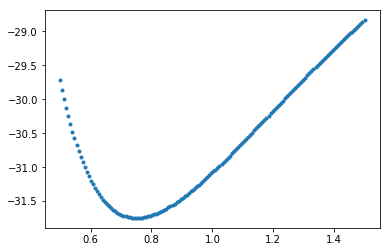

In [4]:
plt.figure()
plt.plot(seps, ens, '.')
plt.show()

## Create Bayesian neural network.

In [6]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import torch
import torch.nn as nn
from torch.nn import functional as fn
from torch.autograd import Variable
import torch.utils.data
import theano
import theano.tensor as t